# Objective of Analysis

Using historical EV registartion data to understand the current market penetration of EVs, and identify key trends and factors driving market expansion.

# Importing Library and DataSet

In [1]:
# Importing the necessary python libraries and the datset
# dataset source is [data.gov]  and this dataset is based on the EV population in the United States
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


ev_data = pd.read_csv('DataSet/EV-data/Electric_Vehicle_Population_Data.csv')

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

# Data Pre processing and Data Cleaning

In [2]:
# Checking the shape of the dataset

ev_data.shape

(177866, 17)

In [3]:
#checking the number of non-null values in each columns

ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

From here looks like Legislative District column is having maximum missing values followed by County,City,Electric Utility, Postal Code, Vehicle Location, 2020 Census Tract

In [2]:
# handling missing values, here I will be simply dropping those rows where we have null values
ev_data.dropna(inplace=True)

In [3]:
#here i will be changing the County column name to Country
ev_data.rename(columns={'County':'Country'},inplace=True)

# Data Analysis

For EV Market Size Analysis, we can explore the following areas:

1)EV Adoption Over Time: Analyze the growth of the EV population by model year.

2)Geographical Distribution: Understand where EVs are most commonly registered (e.g., by country or city).

3)EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).

4)Make and Model Popularity: Identify the most popular makes and models among the registered EVs.

5)Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.

6)Growth in Market Size: Analyze and find the growth in the market size of electric vehicles.

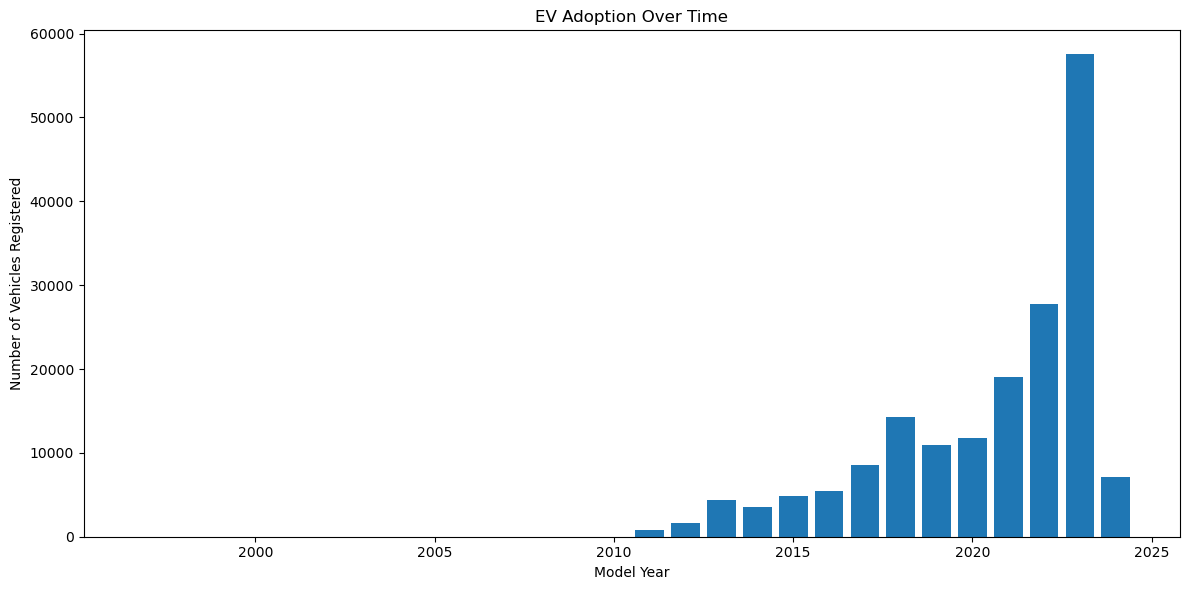

In [14]:
#EV Adoption Over Time

plt.figure(figsize=(12,6))
ev_by_year=ev_data['Model Year'].value_counts().sort_index()
#my_cmap=plt.get_cmap('viridis')
plt.bar(ev_by_year.index,ev_by_year.values)
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks()
plt.tight_layout()
plt.show()

Findings from the Bar Chart :

From the above bar chart it is clear that the EV market is increasing over time. Especially the upward trend starting from the year 2016.
The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption

In [15]:
# Now Let's start by selecting the top 3 countries based on EV registration and then 
# analyzing the distribution of EVs within the cities of those countries

#distribution at country level

ev_distribution_country = ev_data['Country'].value_counts()
top_countries = ev_distribution_country.head(3).index

#filtering the dataset for these top countries
top_countries_data=ev_data[ev_data['Country'].isin(top_countries)]

# analyzing the distribution of EVs within the cities of these top countries
ev_city_distribution_top_countries = top_countries_data.groupby(['Country', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')


ev_city_distribution_top_countries

,Country,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
...,...,...,...
108,Snohomish,Alderwood Manor,1
109,Snohomish,Startup,1
110,King,Gold Bar,1
111,Pierce,Kapowsin,1


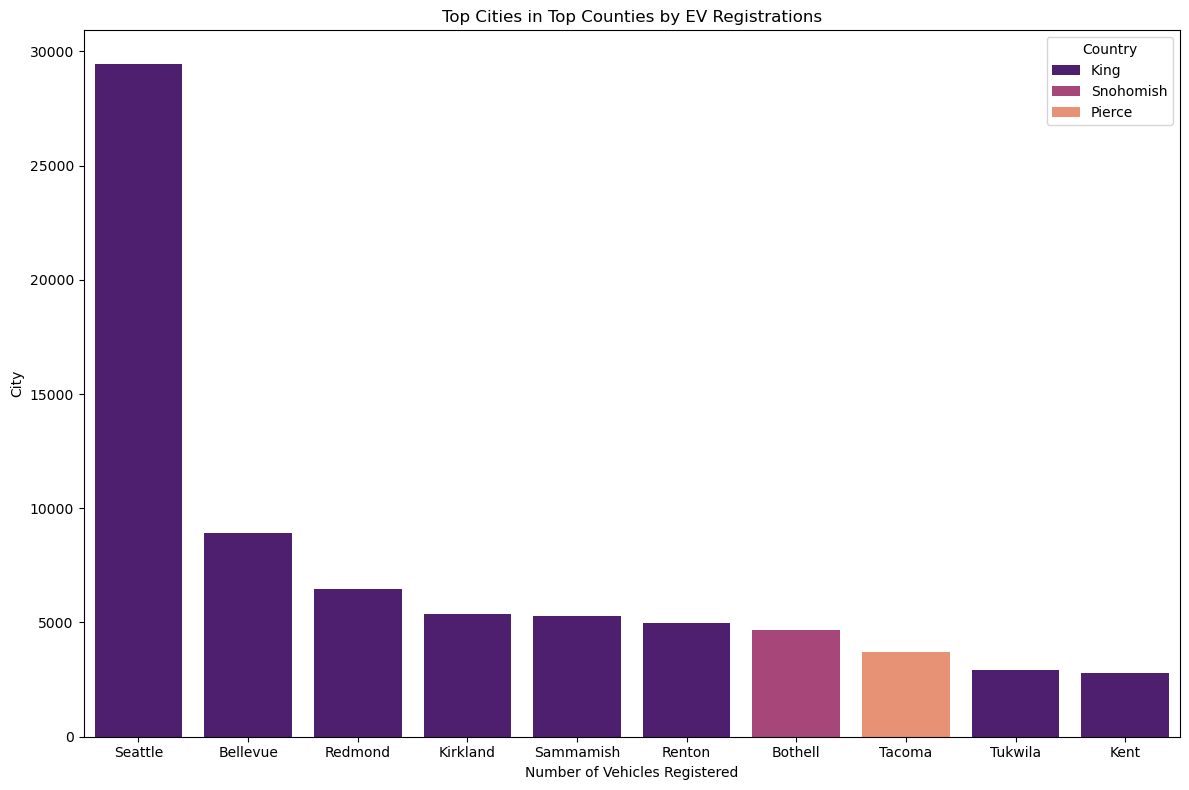

In [40]:
# Now visualizing top 10 cities across these countries

top_cities=ev_city_distribution_top_countries.head(10)


plt.figure(figsize=(12,8))
sns.barplot(x='City', y='Number of Vehicles', hue='Country', data=top_cities, palette="magma",dodge=False)
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

Above graph compares the number of electric vehicles registered in various cities within three countries: King, Snohomish, and Pierce.
The vertical bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by country


Key Findings :

1) Seattle, which is in King Country, has the highest number of EV registrations 

2) Bellevue and Redmond, also in King Country, follow Seattle with the next highest registrations

3) Majority of cities shown are from King Country, which seems to dominate EV registrations among the three countries

4) Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King Country.

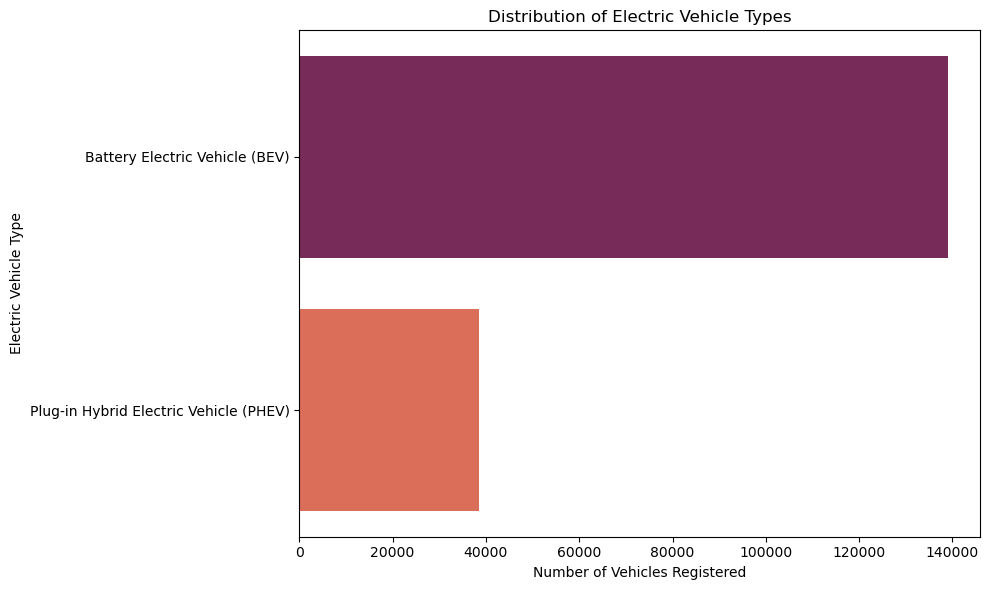

In [43]:
#analyzing the distribution of Electric Vehicle type 

ev_distibution_type=ev_data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_distibution_type.values, y=ev_distibution_type.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

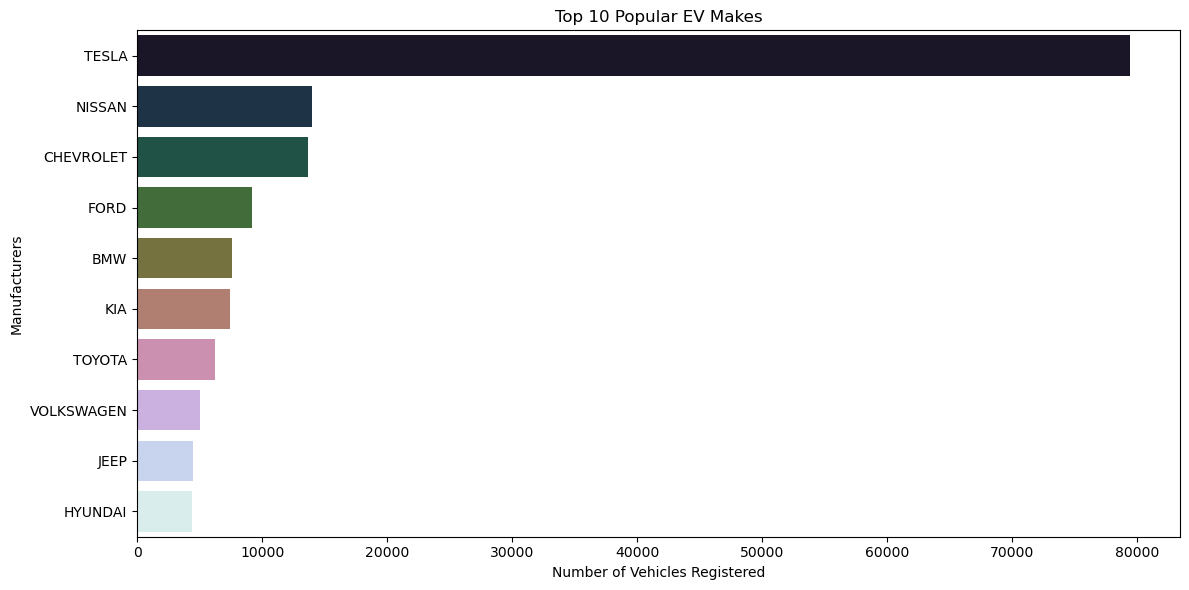

In [47]:
# Now analyzing the popularity of EV manufacturers
#limiting to top 10 only
ev_popular_makers=ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_popular_makers.values, y=ev_popular_makers.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Manufacturers')
plt.tight_layout()
plt.show()

The above chart shows that:

TESLA leads with the highest number of vehicles registered.

NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.

FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.

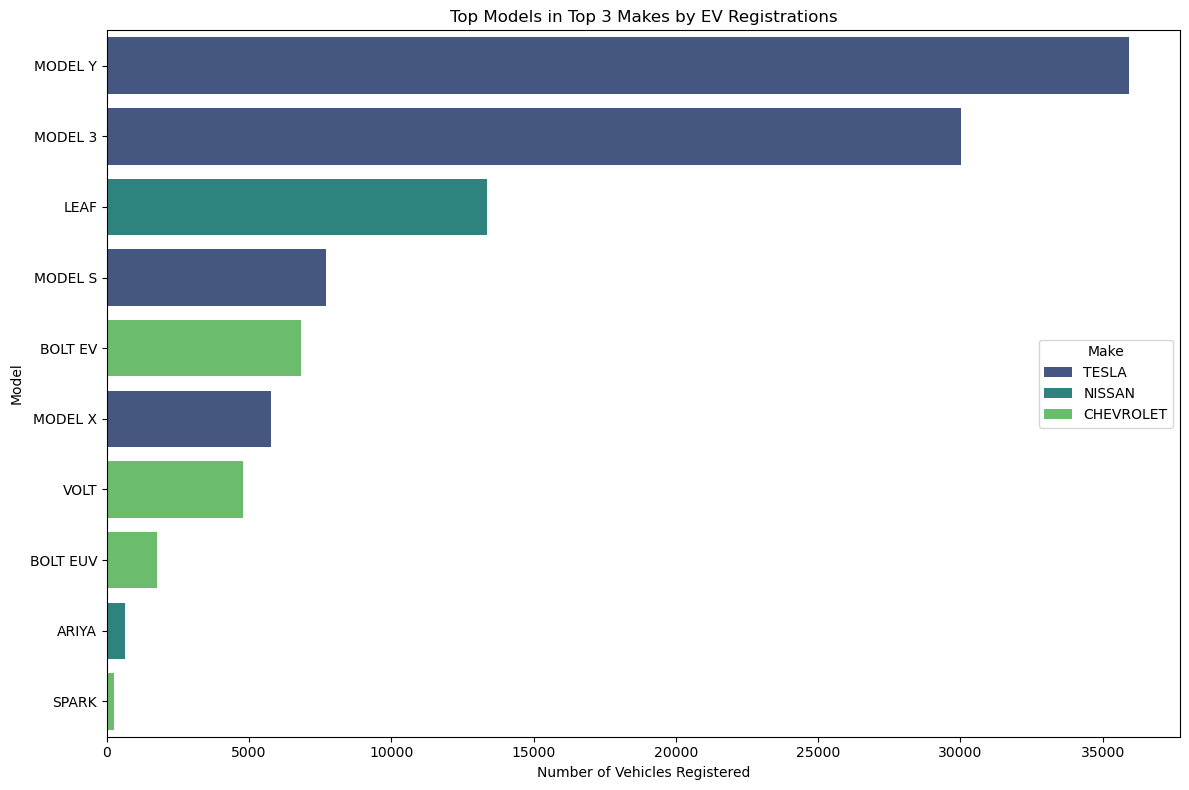

In [52]:
# Finding the most popular models among these top 3 manufacturers

top_3_manufacturers=ev_popular_makers.head(3).index

#filtering the dataset based on the manufacturers
top_makes_data=ev_data[ev_data.Make.isin(top_3_manufacturers)]

#Grouping the data based on Make and Model
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models
top_10_models_make=ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_10_models_make, palette="viridis",dodge=False)
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. 

Here are the findings:
1) TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.

2) NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.

3) TESLA’s MODEL S and MODEL X also have a significant number of registrations.

4) NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

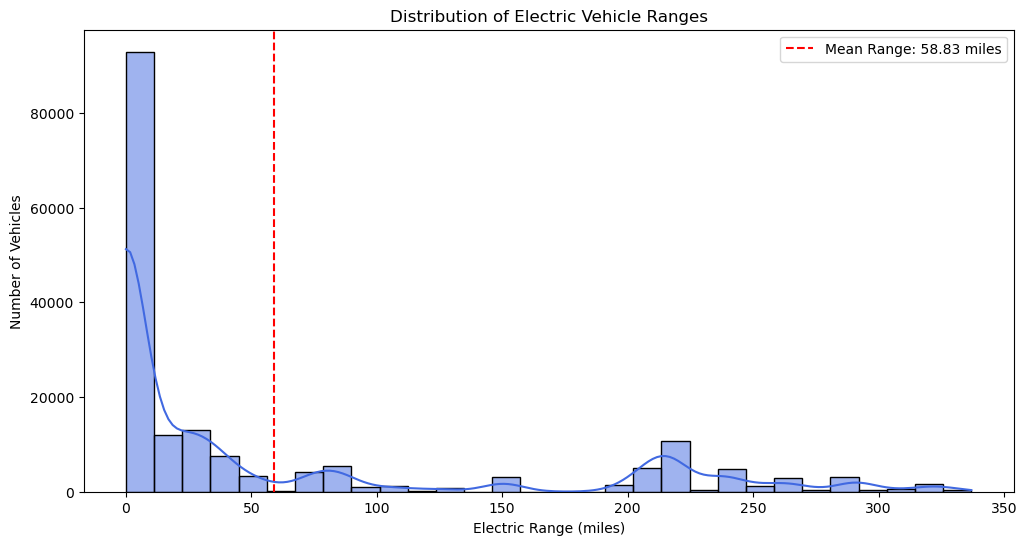

In [6]:
## Now Analyzing distribution of electric range
#electric range indicates how far an EV can travel on a single charge, and 
#advancements in battery technology have been steadily increasing these ranges over the years.


plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()


The above graph shows the mean electric range. 

Key observations from the graph include:

1) There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.

2) The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.

3) The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph

It suggests that while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges.

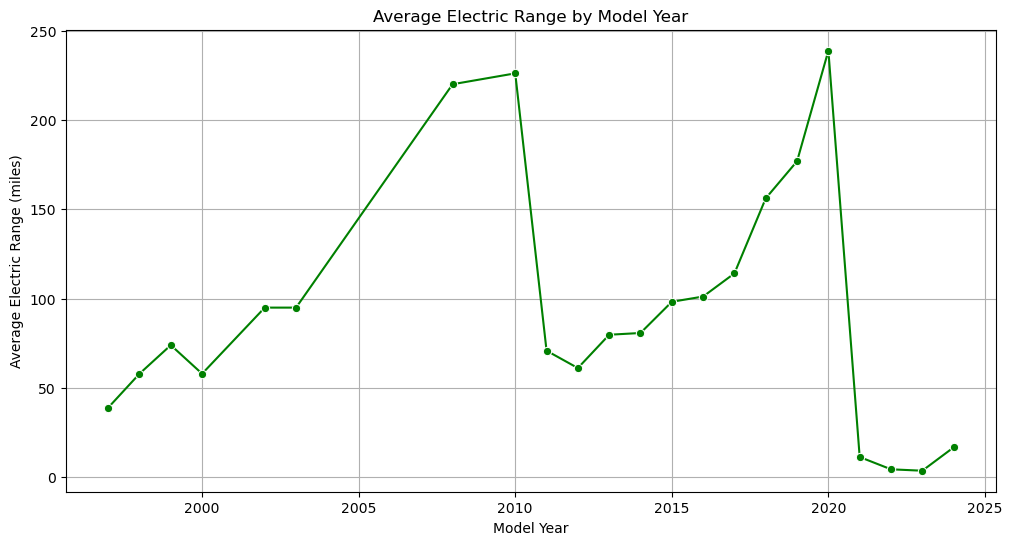

In [8]:
## Calculating average electric range by model year

average_range_by_year=ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024.

Key findings from the graph:

1) There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.

2) There is a noticeable peak around the year 2020 when the average range reaches its highest point.

3) Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.

4) There is a slight recovery in the average range in the most recent year shown on the graph.

In [13]:
# Let's explore the estimated market size of EVs registered each year


# calculate the number of EVs registered each year
ev_registration_counts=ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

In 2021, there were 19,063 EVs registered.

In 2022, the number increased to 27708 EVs.

In 2023, a significant jump to 57,519 EVs was observed.

For 2024, currently, 7,072 EVs are registered, which suggests partial data.

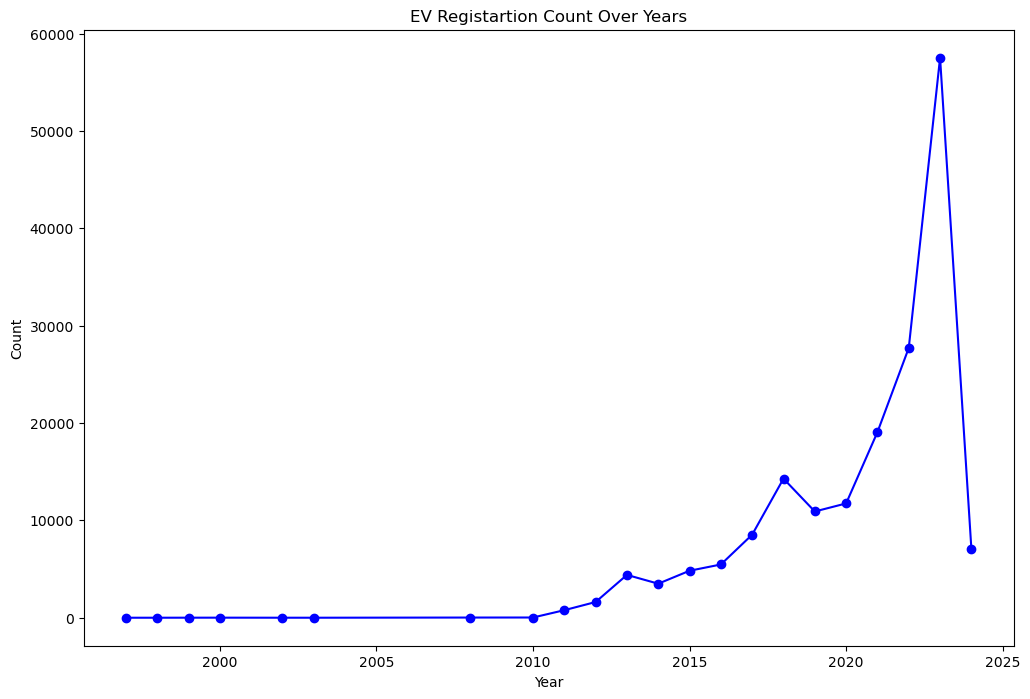

In [16]:
# let's plot this ev_registration_count
plt.figure(figsize=(12, 8))
plt.plot(ev_registration_counts.index,ev_registration_counts.values, 'bo-')
plt.title('EV Registartion Count Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

The above graph shows the increase in registration count over years.

key Findings :

1) The registration count is highest in year 2023 

2) The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.